### 4 Getting started with neural networks
### Practice Notebook
---
*by Pablo Bauer*


### 4.2  Classifying newswires: A multiclass Classification example
---

In [1]:
from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [6]:
word_index = reuters.get_word_index()

reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)

decode_newswire = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]]
)

550378/550378 [==============================] - 0s 0us/step


In [7]:
decode_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [8]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))

  for i , sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] = 1.

  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [9]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [13]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

In [15]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [16]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [17]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Epoch 1/20
16/16 [==============================] - 3s 131ms/step - loss: 2.7435 - accuracy: 0.4783 - val_loss: 1.8633 - val_accuracy: 0.6060
Epoch 2/20
16/16 [==============================] - 1s 57ms/step - loss: 1.5638 - accuracy: 0.6728 - val_loss: 1.4014 - val_accuracy: 0.6940
Epoch 3/20
16/16 [==============================] - 1s 60ms/step - loss: 1.2004 - accuracy: 0.7378 - val_loss: 1.2180 - val_accuracy: 0.7280
Epoch 4/20
16/16 [==============================] - 1s 58ms/step - loss: 0.9826 - accuracy: 0.7873 - val_loss: 1.0965 - val_accuracy: 0.7610
Epoch 5/20
16/16 [==============================] - 1s 58ms/step - loss: 0.8125 - accuracy: 0.8240 - val_loss: 1.0197 - val_accuracy: 0.7930
Epoch 6/20
16/16 [==============================] - 1s 59ms/step - loss: 0.6817 - accuracy: 0.8540 - val_loss: 0.9709 - val_accuracy: 0.7970
Epoch 7/20
16/16 [==============================] - 1s 57ms/step - loss: 0.5671 - accuracy: 0.8781 - val_loss: 0.9405 - val_accuracy: 0.8020
Epoch 8/20
1

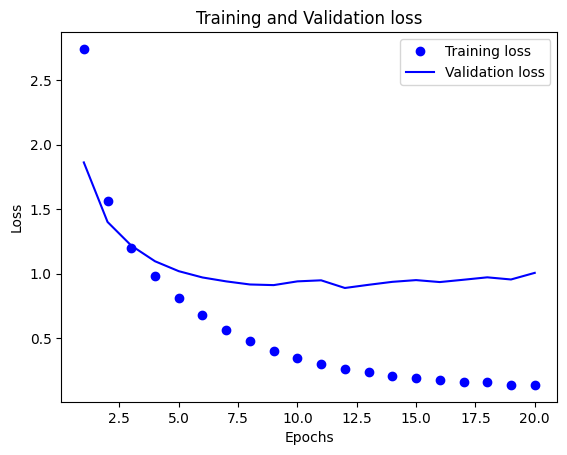

In [20]:
import matplotlib.pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

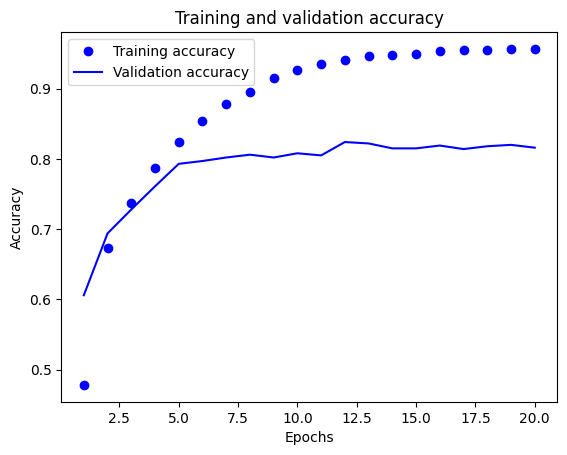

In [21]:

plt.clf() #limpia la imagen anterior
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()